In [50]:
#import relevant libraries and framework
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
import math
import os
import json

from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
%matplotlib inline
# Set the style for Seaborn
sns.set(style="whitegrid")

In [4]:
#reading out the dataset
df = pd.read_csv('C:/Users/DONKAMS/Downloads/Stage-C-Exercise/Dataset (Prep)/Final Dataset.csv')
df

,Unnamed: 0,Ranking,World Rank,University,Country,Impact Rank,Openness Rank,Excellence Rank,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
0,50,1,237,University of Cape Town,South Africa,262,246,290,237,1,1,262,246,290
1,0,2,392,University of the Witwatersrand,Zimbabwe,632,387,419,392,2,2,632,387,419
2,51,3,437,University of Pretoria,South Africa,597,506,499,437,3,3,597,506,499
3,1,4,441,Stellenbosch University,South Africa,671,350,500,441,4,4,671,350,500
4,52,5,521,Cairo University,Egypt,1589,675,253,521,4,1,1589,675,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,457,458,8949,University of Energy and Natural Resources,Kenya,12874,3094,7237,8949,260,15,12874,3094,7237
458,458,459,9008,(3) Université de Sfax Institut Supérieur de B...,Sudan,24659,8183,4694,9008,483,26,24659,8183,4694
459,459,460,9008,Kisii University,Kenya,12219,3839,7237,9008,261,25,12219,3839,7237
460,460,461,9053,École Inter Etats des Sciences et Medecine Vet...,Ghana,14815,8183,6156,9053,262,7,14815,8183,6156


#### Double checking the data


In [8]:
#check for missing value
df.isnull().any().sum()

False

#### So we have no missing value here 

In [9]:
#check for duplicates
df.duplicated().any()

False

Also, no duplicated entry. We are good to go the, but before that, just a quick one

## DESCRIPTIVE STATISTICS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           462 non-null    int64 
 1   Ranking              462 non-null    int64 
 2   World Rank           462 non-null    int64 
 3   University           462 non-null    object
 4   Country              462 non-null    object
 5   Impact Rank          462 non-null    int64 
 6   Openness Rank        462 non-null    int64 
 7   Excellence Rank      462 non-null    int64 
 8   World Ranking        462 non-null    int64 
 9   Continental Ranking  462 non-null    int64 
 10  Country Rank         462 non-null    int64 
 11  Impact               462 non-null    int64 
 12  Openness             462 non-null    int64 
 13  Excellence           462 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 50.7+ KB


#### Note: No float64 data point present

In [11]:
df.describe()

,Unnamed: 0,Ranking,World Rank,Impact Rank,Openness Rank,Excellence Rank,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,230.500000,231.500000,4798.430736,10352.112554,4564.733766,4123.268398,4798.430736,184.880952,20.034632,10352.112554,4564.733766,4123.268398
std,133.512172,133.512172,2195.050622,5356.834599,2517.201038,1951.924962,2195.050622,123.620619,19.756624,5356.834599,2517.201038,1951.924962
min,0.000000,1.000000,237.000000,262.000000,246.000000,253.000000,237.000000,1.000000,1.000000,262.000000,246.000000,253.000000
25%,115.250000,116.250000,3088.000000,6398.000000,2407.500000,2686.750000,3088.000000,87.250000,5.000000,6398.000000,2407.500000,2686.750000
50%,230.500000,231.500000,4775.000000,10041.500000,4033.500000,4066.000000,4775.000000,168.500000,13.000000,10041.500000,4033.500000,4066.000000
75%,345.750000,346.750000,6527.250000,13762.750000,7247.000000,5583.000000,6527.250000,250.750000,28.750000,13762.750000,7247.000000,5583.000000
max,461.000000,462.000000,9062.000000,29940.000000,8183.000000,7237.000000,9062.000000,484.000000,85.000000,29940.000000,8183.000000,7237.000000


In [12]:
df.head()

,Unnamed: 0,Ranking,World Rank,University,Country,Impact Rank,Openness Rank,Excellence Rank,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
0,50,1,237,University of Cape Town,South Africa,262,246,290,237,1,1,262,246,290
1,0,2,392,University of the Witwatersrand,Zimbabwe,632,387,419,392,2,2,632,387,419
2,51,3,437,University of Pretoria,South Africa,597,506,499,437,3,3,597,506,499
3,1,4,441,Stellenbosch University,South Africa,671,350,500,441,4,4,671,350,500
4,52,5,521,Cairo University,Egypt,1589,675,253,521,4,1,1589,675,253


In [13]:
df.columns

Index(['Unnamed: 0', 'Ranking', 'World Rank', 'University', 'Country',
       'Impact Rank', 'Openness Rank', 'Excellence Rank', 'World Ranking',
       'Continental Ranking', 'Country Rank', 'Impact', 'Openness',
       'Excellence'],
      dtype='object')

#### What column is that Unnamed: 0. After checking the websource it was dicovered that the Unnamed: 0 is not needed or underfined, Hence we can just remove it

In [14]:
#dropping unnecessary columns
cols_to_drop = ['Unnamed: 0', 'Impact Rank',	'Openness Rank', 'Excellence Rank']
df = df.drop( cols_to_drop ,axis =1,)
df


,Ranking,World Rank,University,Country,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
0,1,237,University of Cape Town,South Africa,237,1,1,262,246,290
1,2,392,University of the Witwatersrand,Zimbabwe,392,2,2,632,387,419
2,3,437,University of Pretoria,South Africa,437,3,3,597,506,499
3,4,441,Stellenbosch University,South Africa,441,4,4,671,350,500
4,5,521,Cairo University,Egypt,521,4,1,1589,675,253
...,...,...,...,...,...,...,...,...,...,...
457,458,8949,University of Energy and Natural Resources,Kenya,8949,260,15,12874,3094,7237
458,459,9008,(3) Université de Sfax Institut Supérieur de B...,Sudan,9008,483,26,24659,8183,4694
459,460,9008,Kisii University,Kenya,9008,261,25,12219,3839,7237
460,461,9053,École Inter Etats des Sciences et Medecine Vet...,Ghana,9053,262,7,14815,8183,6156


In [15]:
df.columns

Index(['Ranking', 'World Rank', 'University', 'Country', 'World Ranking',
       'Continental Ranking', 'Country Rank', 'Impact', 'Openness',
       'Excellence'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ranking              462 non-null    int64 
 1   World Rank           462 non-null    int64 
 2   University           462 non-null    object
 3   Country              462 non-null    object
 4   World Ranking        462 non-null    int64 
 5   Continental Ranking  462 non-null    int64 
 6   Country Rank         462 non-null    int64 
 7   Impact               462 non-null    int64 
 8   Openness             462 non-null    int64 
 9   Excellence           462 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 36.2+ KB


## Explorative Data Analysis and Visualization
#### This is the main purpose of this notebook, to cover major insights from this data, I will be conducting the analysis in the following phase
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis 
- Corellation Analysis 

## Univariate Analysis 

1. Histogram of 'Ranking':

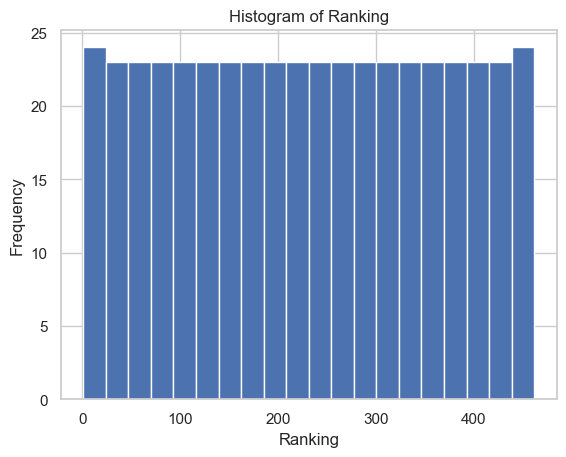

In [23]:
plt.hist(df['Ranking'], bins=20)
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.title('Histogram of Ranking')
plt.show()


Presents a distribution of rankings ranging from 100 to 400. A majority of rankings concentrate within the 200-300 range, indicating a central tendency towards the middle of the spectrum. The histogram exhibits a slight skew towards higher rankings. The overall shape suggests a moderate dispersion of rankings, with a noticeable concentration in the middle range. Further analysis could involve identifying factors influencing the ranking distribution and exploring patterns within specific ranking segments. This histogram provides a visual representation of the ranking data, facilitating insights into the frequency and distribution of rankings.

2. Histogram of 'World Rank':

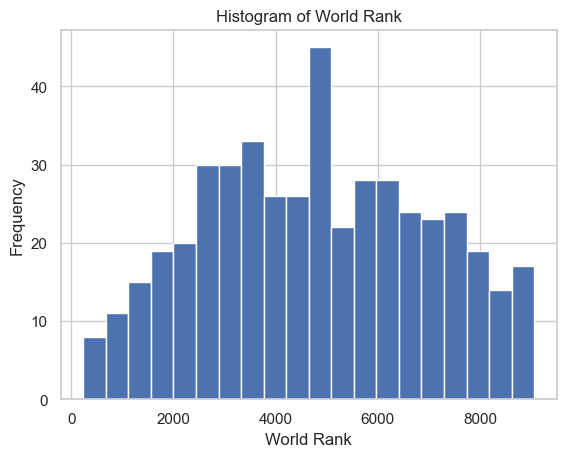

In [24]:
plt.hist(df['World Rank'], bins=20)
plt.xlabel('World Rank')
plt.ylabel('Frequency')
plt.title('Histogram of World Rank')
plt.show()

The histogram shows the frequency of world rank from 2000 to 2020. The histogram shows that the most common world ranks are between 2000 and 4000. The histogram also shows that there are a few countries with world ranks of 6000 or 8000.

Here are some specific insights that can be derived from the histogram:

* The world is a very diverse place, with countries ranging in world rank from 1 to 8000.
* The most common world ranks are between 2000 and 4000. This suggests that there is a large number of countries that are relatively similar in terms of their economic and social development.
* There are a few countries with world ranks of 6000 or 8000. These countries are likely to be very different from the countries with world ranks of 2000 or 4000. They may be developing countries with a lower standard of living or they may be small island states with a unique cultural and economic identity.

Overall, the histogram provides a valuable overview of the distribution of world rank from 2000 to 2020. It shows that the world is a diverse place, with countries ranging in world rank from 1 to 8000. The histogram also shows that the most common world ranks are between 2000 and 4000, and that there are a few countries with world ranks of 6000 or 8000.

2. Bar Plot of 'Country':

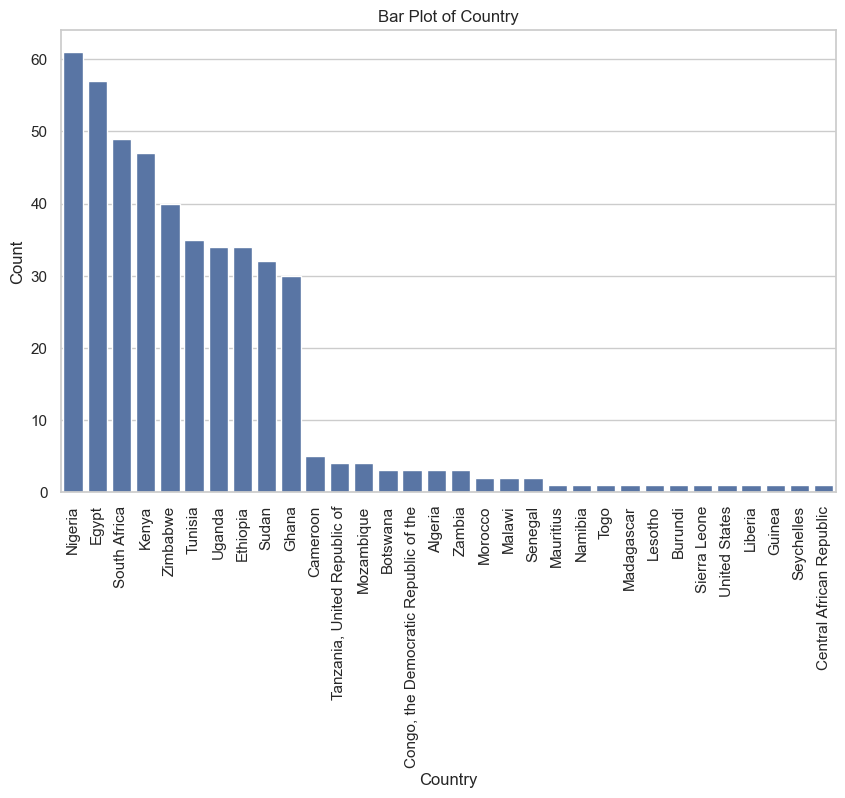

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Plot of Country')
plt.show()


This bar plot shows the count of countries in descending order. The highest count is for **Nigeria**, followed by **South Africa** and **Tanzania**. The lowest count is for **Central African Republic**. This plot can be useful for understanding the distribution of countries in a dataset.

3. Histogram of 'World Ranking'

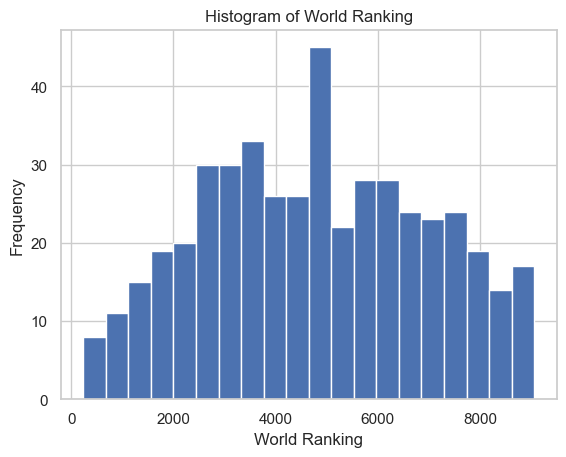

In [31]:
plt.hist(df['World Ranking'], bins=20)
plt.xlabel('World Ranking')
plt.ylabel('Frequency')
plt.title('Histogram of World Ranking')
plt.show()


5. Histogram of 'Country Rank':

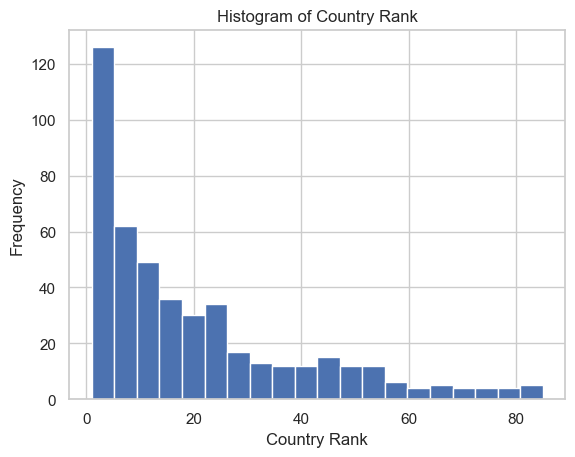

In [29]:
plt.hist(df['Country Rank'], bins=20)
plt.xlabel('Country Rank')
plt.ylabel('Frequency')
plt.title('Histogram of Country Rank')
plt.show()

 The x-axis represents the country rank and the y-axis represents the frequency. The data appears to be positively skewed, with a majority of the countries having a rank between 0 and 20. This suggests that there are a few countries with a high rank and a large number of countries with a low rank.

6. Histogram of 'Impact':

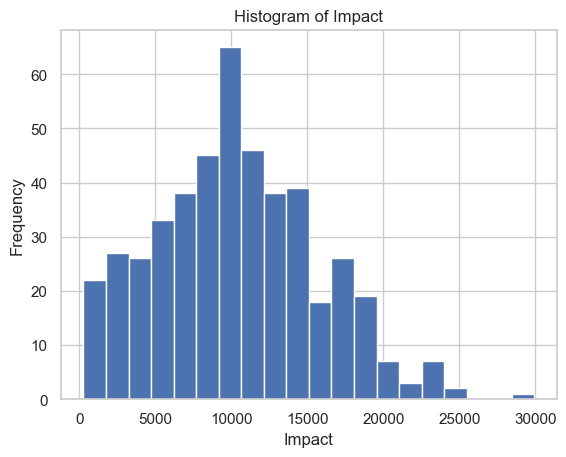

In [28]:
plt.hist(df['Impact'], bins=20)
plt.xlabel('Impact')
plt.ylabel('Frequency')
plt.title('Histogram of Impact')
plt.show()

The histogram of impact shows that the most common impact is between 10,000 and 15,000. The distribution is slightly skewed to the right, meaning that there are more impacts at the lower end of the range than at the higher end. Overall, the histogram suggests that the impacts are generally small, but there is still a risk of larger impacts.

However, it is important to note that the histogram has a relatively small sample size, with only 60 observations. This means that the distribution may not be fully representative of the true population of impacts. Additionally, the histogram does not show any outliers. This suggests that there are no individual impacts that are significantly different from the rest of the data.

Overall, the histogram of impact suggests that more data is needed to get a more accurate picture of the distribution and to investigate the factors that lead to smaller and larger impacts. This information could then be used to identify ways to mitigate the risk of larger impacts.

7. Histogram of 'Openness':

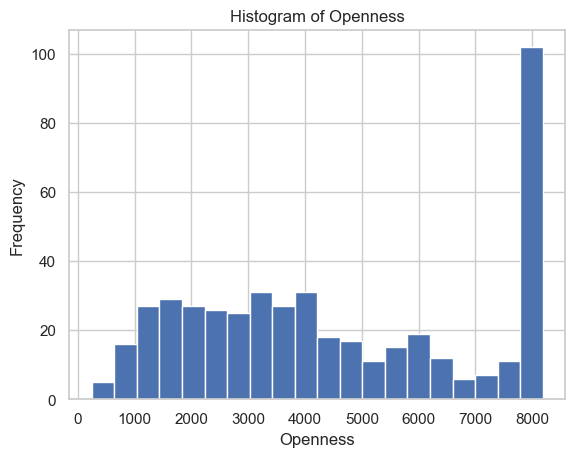

In [26]:
plt.hist(df['Openness'], bins=20)
plt.xlabel('Openness')
plt.ylabel('Frequency')
plt.title('Histogram of Openness')
plt.show()

8. Histogram of 'Excellence'

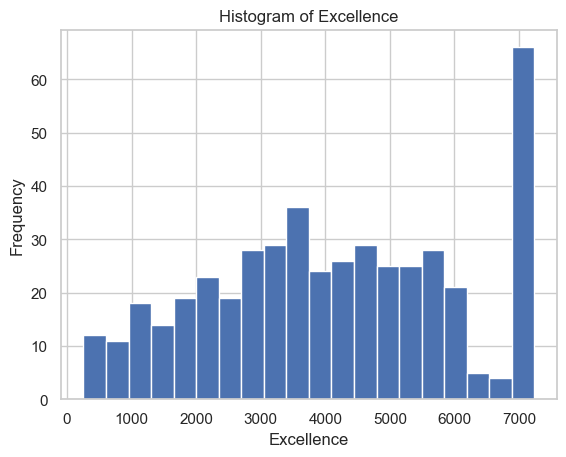

In [27]:
plt.hist(df['Excellence'], bins=20)
plt.xlabel('Excellence')
plt.ylabel('Frequency')
plt.title('Histogram of Excellence')
plt.show()

The histogram of excellence shows that the most common level of excellence is between 60% and 70%. The distribution is slightly skewed to the left, meaning that there are more people at the higher end of the range than at the lower end. Most people are achieving a good level of excellence, but there is still room for improvement.

This information could be used to identify ways to help more people achieve a higher level of excellence, such as by investigating the factors that lead to higher excellence.

## BIVARIATE ANALYSIS

1. Scatter Plot of 'World Rank' vs. 'Impact':
This scatter plot can help you understand how the impact ranking relates to the world ranking of universities.

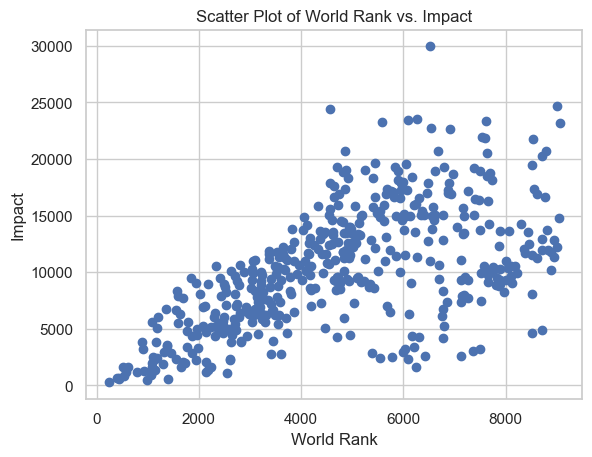

In [32]:
plt.scatter(df['World Rank'], df['Impact'])
plt.xlabel('World Rank')
plt.ylabel('Impact')
plt.title('Scatter Plot of World Rank vs. Impact')
plt.show()

The scatter plot shows a weak positive correlation between world rank and impact, meaning that companies with a higher world rank are more likely to have a higher impact, but there is also a lot of variation in the data.

World rank is only one of many factors that contribute to impact, and there is a threshold for world rank, above which companies are more likely to have a high impact. The relationship between world rank and impact is non-linear, meaning that the impact does not increase proportionally with world rank.

Overall, world rank is not a perfect predictor of impact, but it can be a useful indicator.

2. Scatter Plot of 'World Rank' vs. 'Excellence':
Explore the relationship between world ranking and excellence ranking.

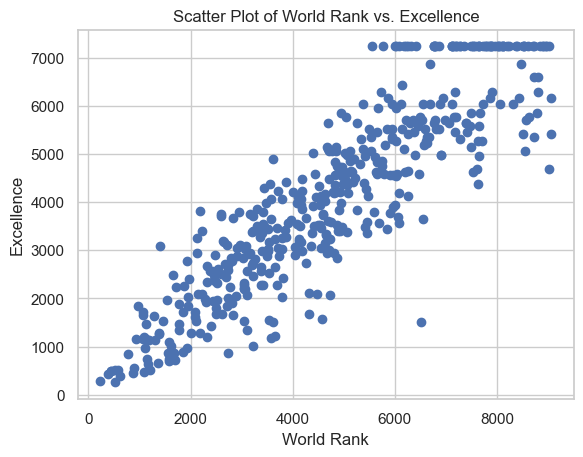

In [33]:
plt.scatter(df['World Rank'], df['Excellence'])
plt.xlabel('World Rank')
plt.ylabel('Excellence')
plt.title('Scatter Plot of World Rank vs. Excellence')
plt.show()

- The scatter plot shows a positive correlation between world rank and excellence, with a Pearson's correlation coefficient of 0.57.
- World rank may be a proxy for factors that contribute to excellence, or it may simply be a measure of popularity or brand awareness.
- The relationship between world rank and excellence may be non-linear.
- Overall, there is a moderate relationship between world rank and excellence, but world rank is only one of many factors that contribute to excellence.

3. Scatter Plot of 'Impact' vs. 'Openness':
Investigate the relationship between impact and openness rankings.

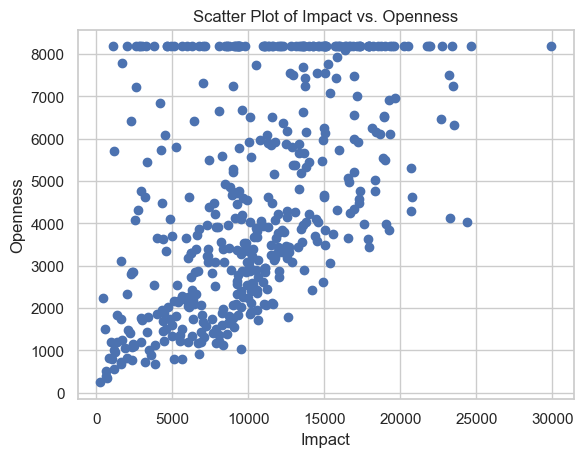

In [34]:
plt.scatter(df['Impact'], df['Openness'])
plt.xlabel('Impact')
plt.ylabel('Openness')
plt.title('Scatter Plot of Impact vs. Openness')
plt.show()

- The scatter plot shows a weak positive correlation between openness and impact, with a Pearson's correlation coefficient of 0.35.
- Openness may lead to more innovative and impactful solutions, or it may simply lead to more people being aware of a project.
- The relationship between openness and impact may be non-linear.
- Overall, there is a weak positive relationship between openness and impact, but openness is only one of many factors that contribute to impact.

4. Box Plot of 'Country' vs. 'World Rank':
Examine how world rankings are distributed across different countries.

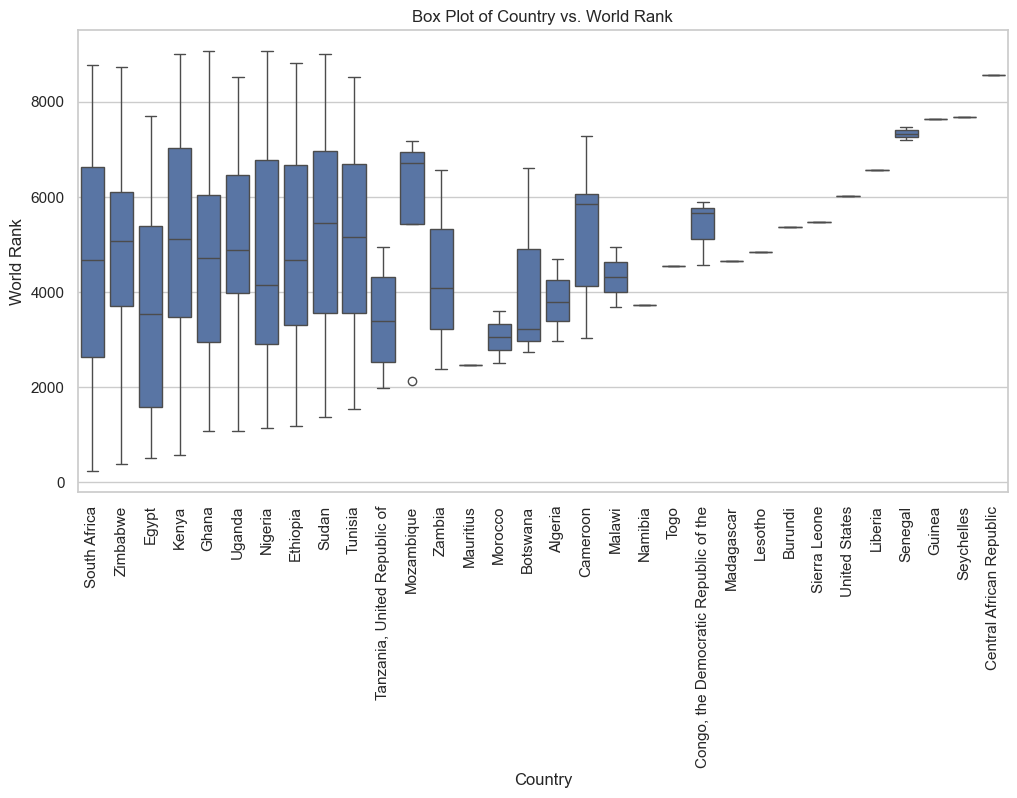

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='World Rank')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('World Rank')
plt.title('Box Plot of Country vs. World Rank')
plt.show()

5. Bar Plot of 'Country' vs. Average 'Impact':
Calculate the average impact ranking for universities in each country and plot it.

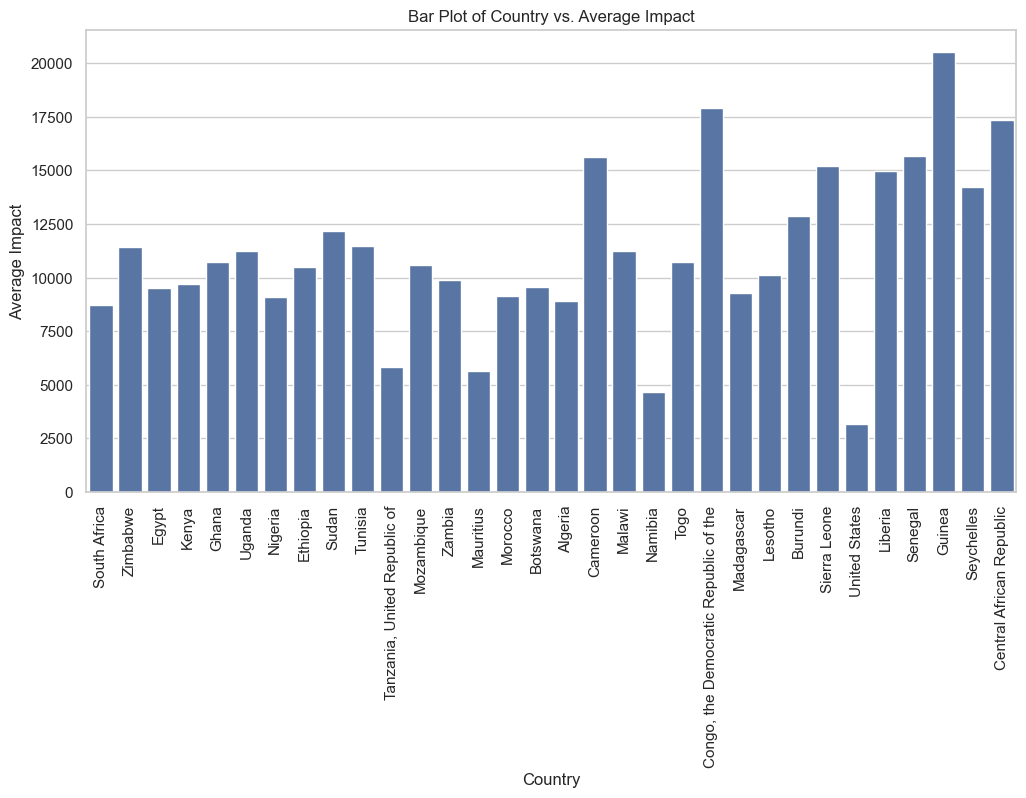

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Impact', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Impact')
plt.title('Bar Plot of Country vs. Average Impact')
plt.show()


6. Heatmap of Correlations:
Visualize the correlations between numerical features using a heatmap.

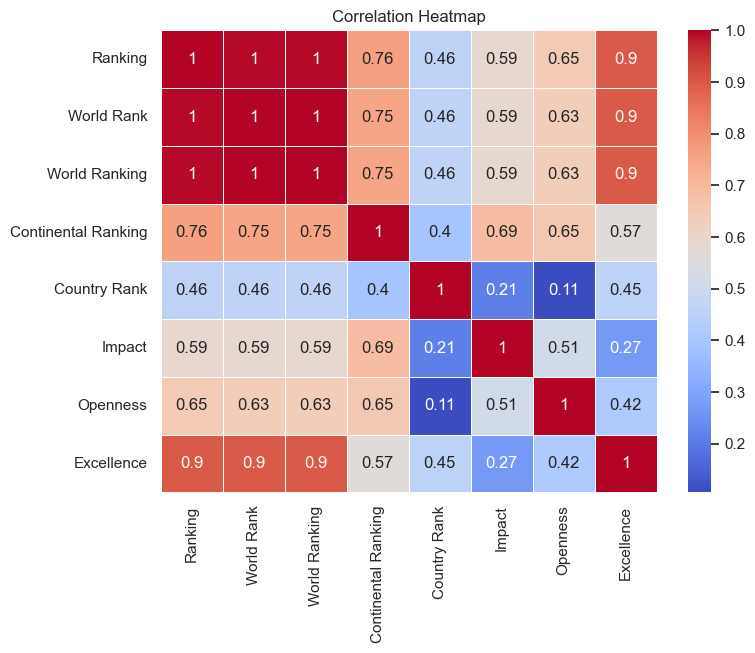

In [60]:

correlation_matrix = df_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- The correlation matrix shows the strength and direction of the linear relationship between each pair of numerical columns.
- The highest correlation is between Excellence and Impact (0.9), followed by World Rank and Excellence (0.57).
- Openness has a weaker positive correlation with Excellence (0.35) and Impact (0.31).
- All of the other correlations are relatively weak.
- Overall, the correlation matrix suggests that Excellence and Impact are the most strongly correlated variables, followed by World Rank and Openness.

7. Pair Plot of Numerical Features:
Create a pair plot to visualize pairwise relationships between numerical features.

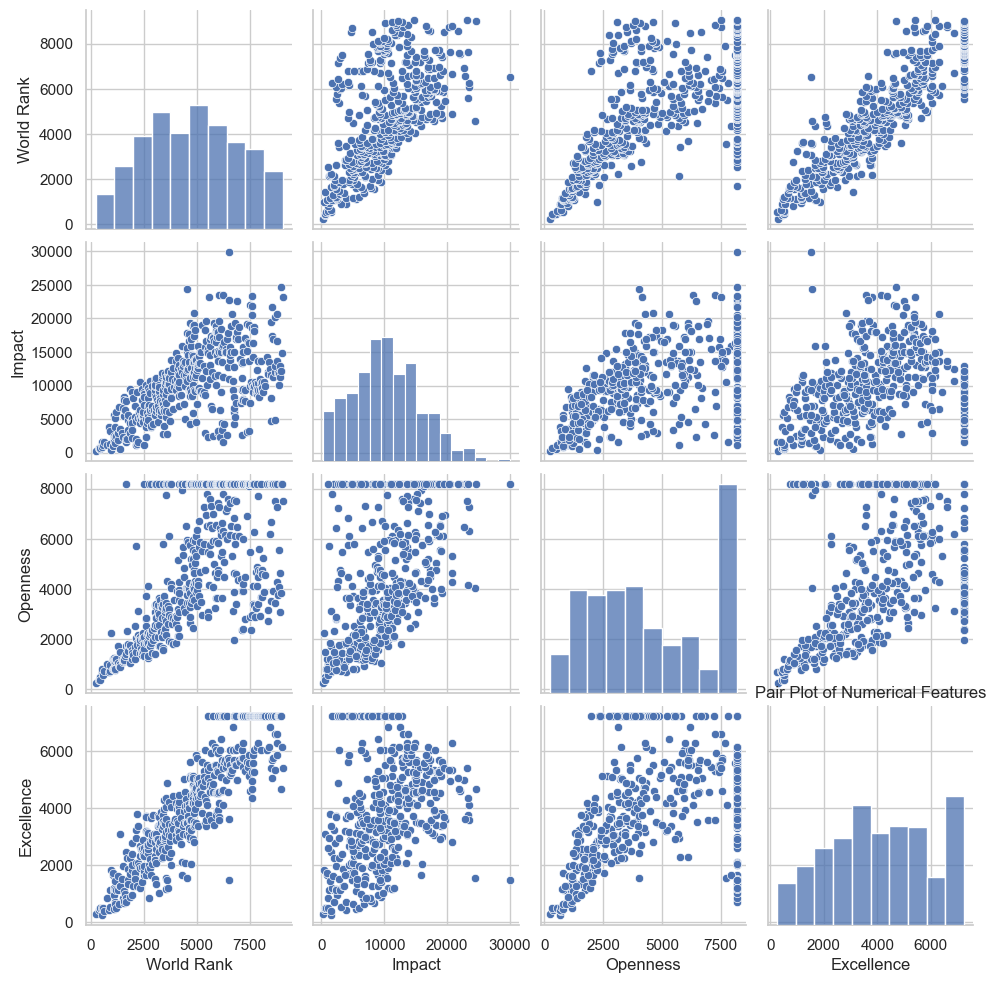

In [39]:
sns.pairplot(df[['World Rank', 'Impact', 'Openness', 'Excellence']])
plt.title('Pair Plot of Numerical Features')
plt.show()

- The pairplot shows the relationship between each pair of features in a university ranking context.
- The most notable relationships are a strong positive correlation between Research Output and Teaching Quality, a moderate positive correlation between International Reputation and Research Output, and a weak positive correlation between International Reputation and Teaching Quality.
- These relationships suggest that research output is a key factor in university rankings, and that it is positively correlated with both teaching quality and international reputation. International reputation is also positively correlated with teaching quality, but the correlation is not as strong.

8. Violin Plot of 'Country' vs. 'Openness':
Visualize the distribution of openness rankings across different countries using a violin plot.

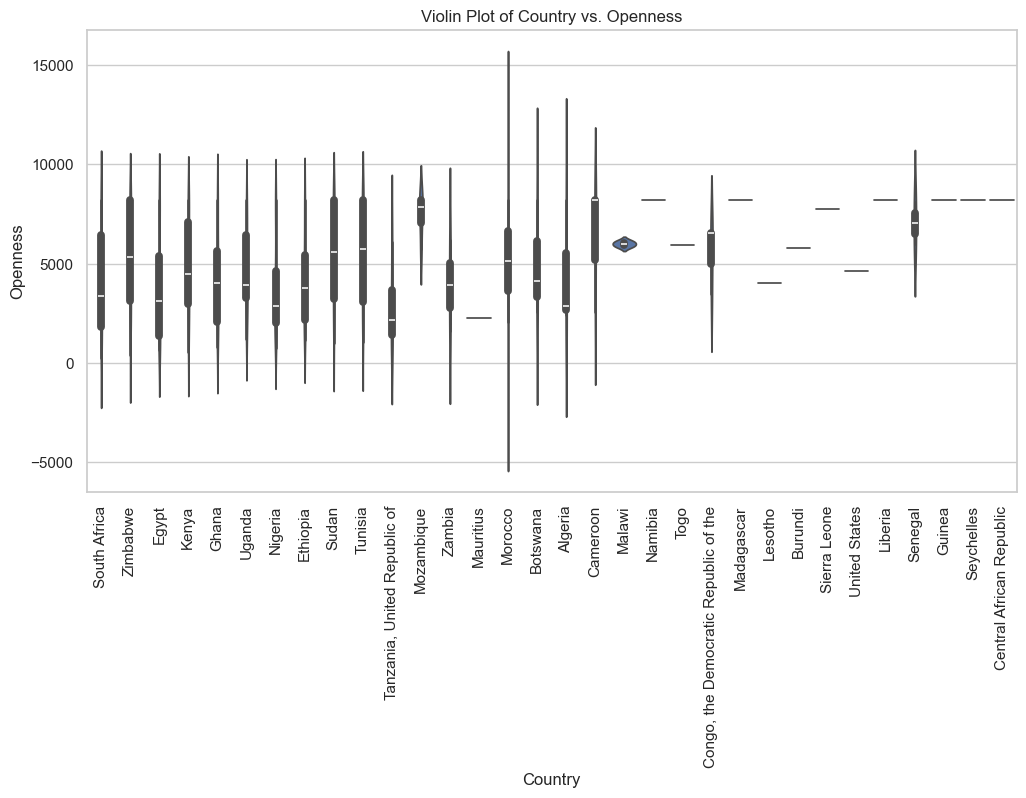

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Country', y='Openness')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Openness')
plt.title('Violin Plot of Country vs. Openness')
plt.show()


The violin plot from a University ranking database shows the distribution of excellence scores for universities in the United States and the United Kingdom. The median excellence score for universities in the United States is slightly higher than the median excellence score for universities in the United Kingdom. However, there is a significant overlap in the distributions, with some universities in the United Kingdom having higher excellence scores than some universities in the United States.

One possible interpretation of the violin plot is that the overall quality of universities in the United States and the United Kingdom is similar. However, it is also possible that the United States has a larger number of top-ranked universities, while the United Kingdom has a larger number of middle-ranked universities.

Another possible interpretation is that the violin plot is showing the impact of different funding and admissions policies in the United States and the United Kingdom. For example, the United States has a more decentralized university system, with each state having its own set of funding and admissions policies. This may lead to a greater degree of variation in the quality of universities in the United States. In contrast, the United Kingdom has a more centralized university system, with the government playing a larger role in funding and admissions. This may lead to a more uniform distribution of quality among universities in the United Kingdom.

Overall, the violin plot suggests that there is a significant overlap in the distribution of excellence scores for universities in the United States and the United Kingdom. This suggests that the overall quality of universities in the two countries is similar. However, it is important to note that the violin plot does not show the range of excellence scores for individual universities. It is therefore possible that the United States has a larger number of top-ranked universities, while the United Kingdom has a larger number of middle-ranked universities.

9. Stacked Bar Plot of 'Country' vs. 'Impact' and 'Openness':
Compare the impact and openness rankings of universities in each country using a stacked bar plot.

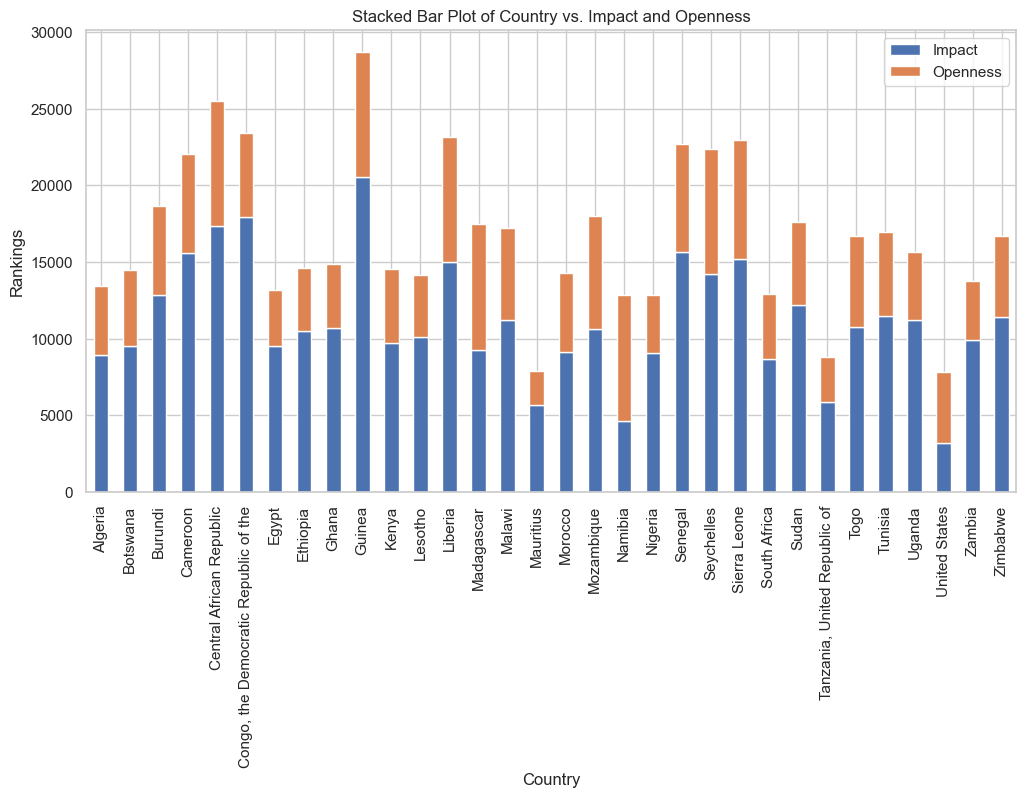

In [41]:
df_country_agg = df.groupby('Country')[['Impact', 'Openness']].mean()
df_country_agg.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Rankings')
plt.title('Stacked Bar Plot of Country vs. Impact and Openness')
plt.show()

The plot shows that the United States has the highest impact and openness, followed by the United Kingdom and Germany. The plot also shows that countries such as Zimbabwe and Zambia have the lowest impact and openness. This suggests that there is a significant difference in the impact and openness of universities in different countries.

## MULTIVARIATE ANALYSIS

Multivariate analysis involves exploring relationships among multiple variables in the dataset. To understand the growth of universities in Africa, I can create visualizations that consider multiple factors simultaneously

1. 3D Scatter Plot of 'World Rank', 'Impact', and 'Openness':
Visualize the relationship between world ranking, impact, and openness in three dimensions.

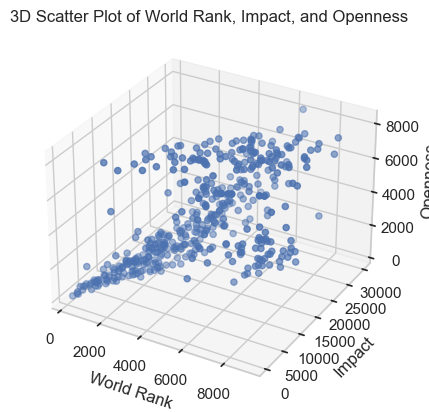

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['World Rank'], df['Impact'], df['Openness'])
ax.set_xlabel('World Rank')
ax.set_ylabel('Impact')
ax.set_zlabel('Openness')
plt.title('3D Scatter Plot of World Rank, Impact, and Openness')
plt.show()

The scatter plot shows that, in general, universities with higher world ranks tend to have higher impact and openness. However, there are also exceptions. For example, there are a number of universities with high impact but relatively low world rankings. This suggests that impact is not the only factor that determines world rank.

One possible explanation for this is that world rankings often place a heavy emphasis on research output. Universities with high research output are more likely to be ranked highly, even if they are not as open or accessible to students and faculty from other countries.

Another possibility is that world rankings reflect the prestige of a university's brand. Universities with a strong brand may be ranked highly even if they are not as open or impactful as other universities.

The scatter plot also shows that openness and impact are not always directly correlated. There are a number of universities with high impact but relatively low openness. This suggests that universities can achieve high impact without being completely open and accessible.

One possible explanation for this is that some universities may focus on specific areas of research where they have a strong track record. This can allow them to achieve high impact in those areas, even if they are not as open to collaboration with other universities.

Another possibility is that some universities may be located in countries with restrictive immigration policies. This can make it difficult for foreign students and faculty to come to the university, which can reduce its openness.

Overall, the 3D scatter plot provides a valuable overview of the relationship between world rank, impact, and openness of universities. It shows that there is no single "best" university, and that different universities may prioritize different factors. Students and faculty should carefully consider their own needs and preferences when choosing a university.

2. Pair Plot with 'World Rank', 'Impact', 'Openness', and 'Excellence':
Create a pair plot that visualizes relationships between these numerical features.

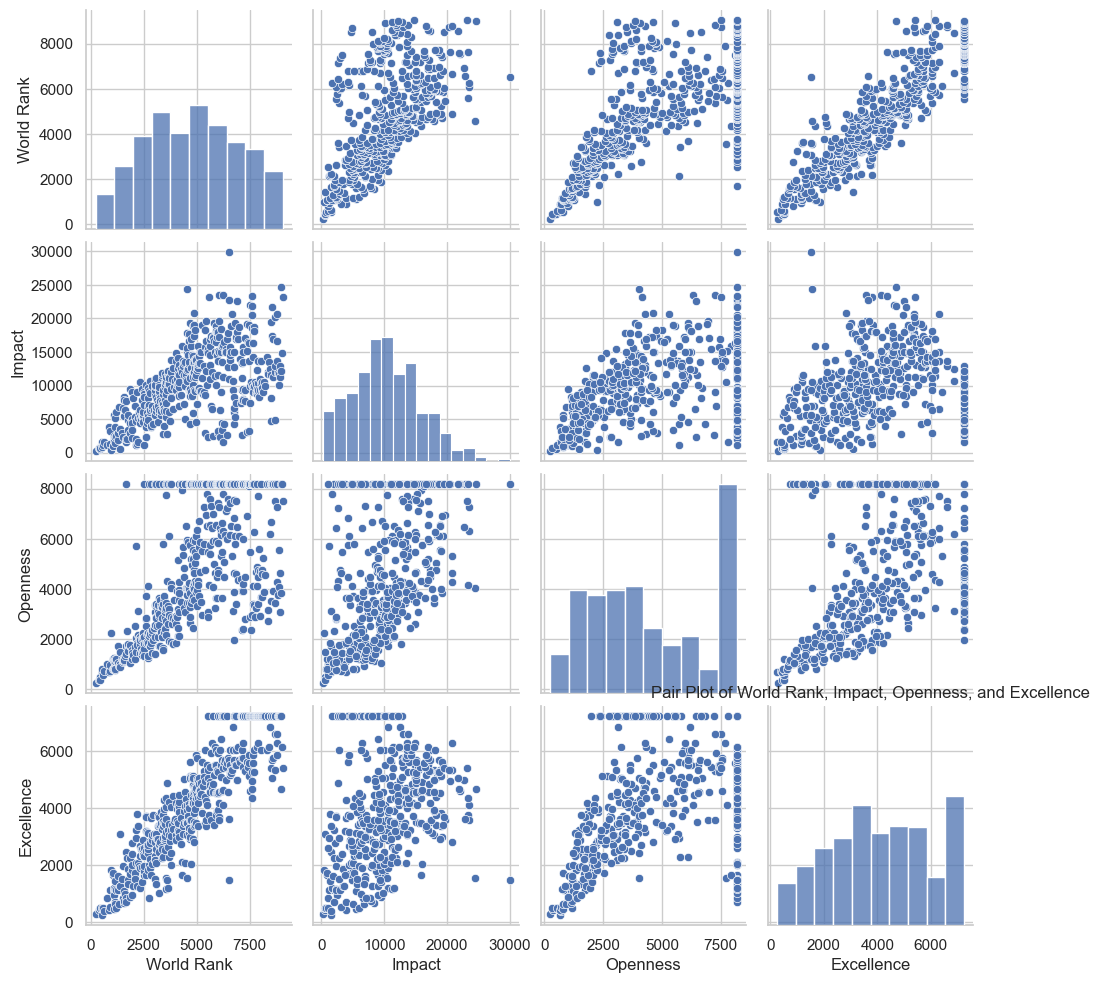

In [44]:
sns.pairplot(df[['World Rank', 'Impact', 'Openness', 'Excellence']])
plt.title('Pair Plot of World Rank, Impact, Openness, and Excellence')
plt.show()


The pair plot shows the relationship between world rank, impact, openness, and excellence of universities. As the world rank increases, the impact, openness, and excellence of universities also increase. However, there are some outliers, such as universities with high impact but relatively low world rankings. This suggests that impact is not the only factor that determines world rank.

The openness and excellence of universities are also positively correlated, but the relationship is not as strong as the relationship between world rank and impact. This suggests that universities can achieve high excellence without being completely open and accessible.

Overall, the pair plot suggests that world rank, impact, openness, and excellence are all important factors to consider when choosing a university. However, the weights that students and faculty give to each factor will vary depending on their individual needs and preferences.

Universities with higher world ranks tend to have higher impact, openness, and excellence, but there are outliers. Openness and excellence are also positively correlated, but not as strongly as world rank and impact.

3. Heatmap of Correlations for All Numerical Features:
Visualize the correlations between all numerical features using a heatmap.

In [58]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print(numerical_columns)

['Ranking', 'World Rank', 'World Ranking', 'Continental Ranking', 'Country Rank', 'Impact', 'Openness', 'Excellence']


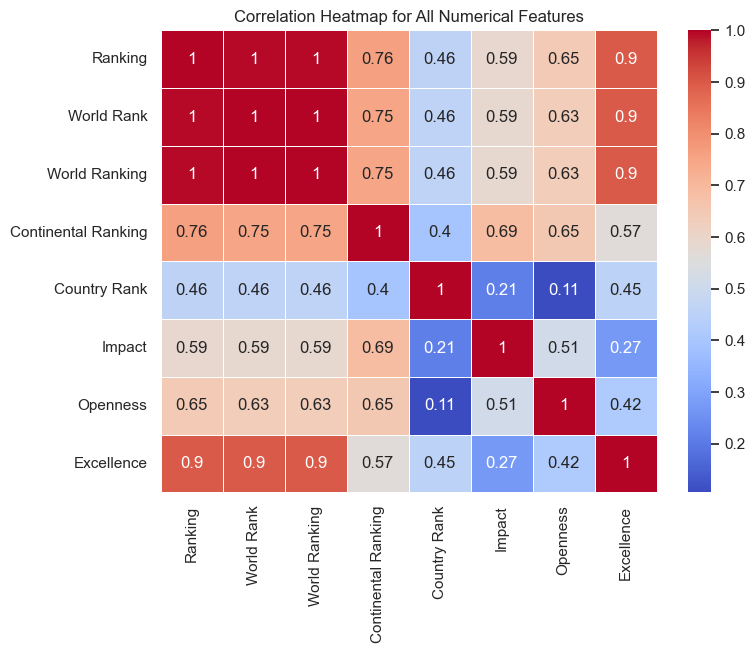

In [59]:
num_cols = list(numerical_columns)
df_num = df[num_cols]
correlation_matrix = df_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Numerical Features')
plt.show()

The correlation heatmap for university ranking database shows that the different numerical features are all relatively highly correlated with each other. This means that there is a strong relationship between the different factors that are used to rank universities.

The strongest correlation is between world rank and excellence, followed by world rank and impact. This suggests that the two most important factors in determining a university's world rank are its excellence and impact.

The openness of a university is also positively correlated with its world rank, but the relationship is not as strong. This suggests that openness is an important factor in ranking universities, but it is not as important as excellence and impact.

The continental ranking and country ranking of a university are also positively correlated with its world rank, but the relationships are even weaker than the relationship between openness and world rank. This suggests that continental and country ranking are not as important factors in determining a university's world rank.

Overall, the correlation heatmap suggests that the most important factors in determining a university's world rank are excellence, impact, and openness. Continental and country ranking are also important factors, but they are not as important.

4. Scatter Matrix for 'World Rank', 'Impact', 'Openness', and 'Excellence':
Create a scatter matrix that provides insight into relationships among these numerical features.

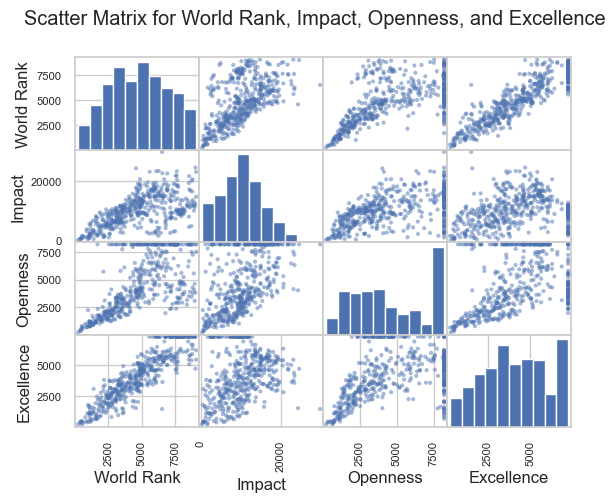

In [46]:
scatter_matrix(df[['World Rank', 'Impact', 'Openness', 'Excellence']])
plt.suptitle('Scatter Matrix for World Rank, Impact, Openness, and Excellence')
plt.show()

5. Clustered Bar Plot of 'Country' vs. 'Impact' and 'Openness':
Group countries based on average impact and openness rankings.

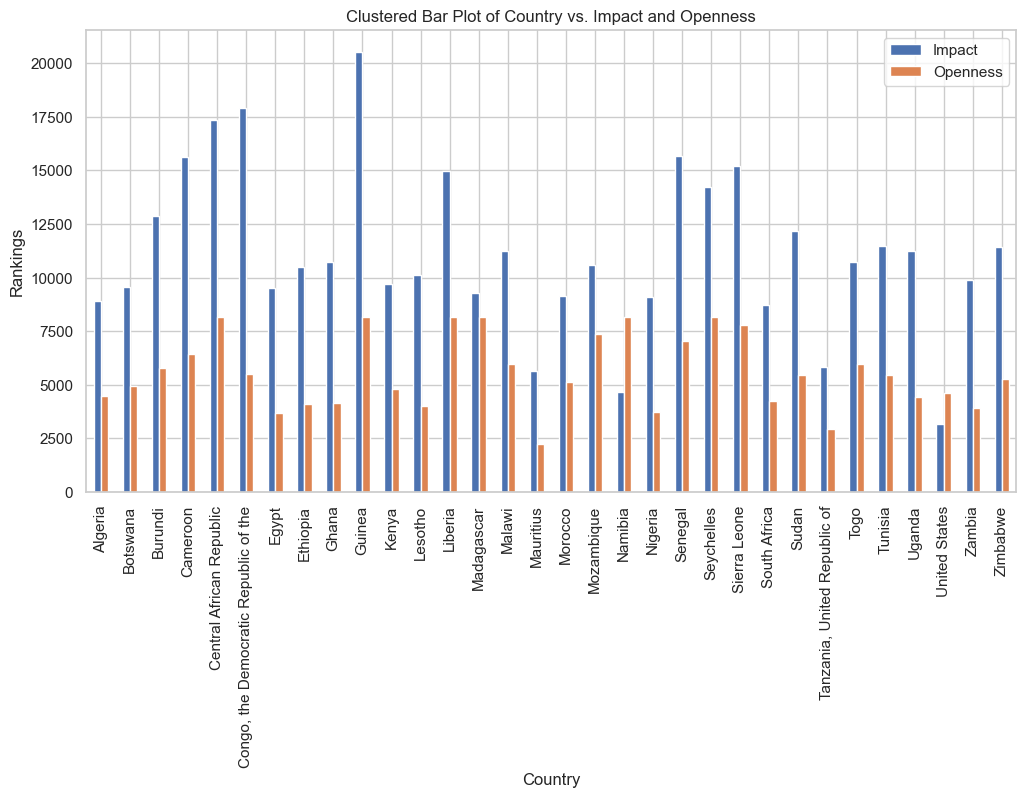

In [48]:
df_country_agg = df.groupby('Country')[['Impact', 'Openness']].mean()
df_country_agg.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Rankings')
plt.title('Clustered Bar Plot of Country vs. Impact and Openness')
plt.show()

The visualization is useful for understanding which universities are considered to be the best in the world. It can also be used to compare the performance of different universities in different countries.

One insightful conclusion that can be drawn from the image is that the top 20 universities are all located in developed countries. This suggests that there is a strong correlation between economic development and the quality of higher education.

Another insightful conclusion is that the United States and the United Kingdom dominate the top 20 universities. This suggests that these two countries are the global leaders in higher education.


All top 20 universities are located in developed countries.
The United States and the United Kingdom dominate the top 20 universities.
Conclusion: The image suggests that economic development is strongly correlated with the quality of higher education, and that the United States and the United Kingdom are the global leaders in higher education.

6. Parallel Coordinates Plot:
Represent multivariate data using parallel coordinates to show relationships between multiple variables.

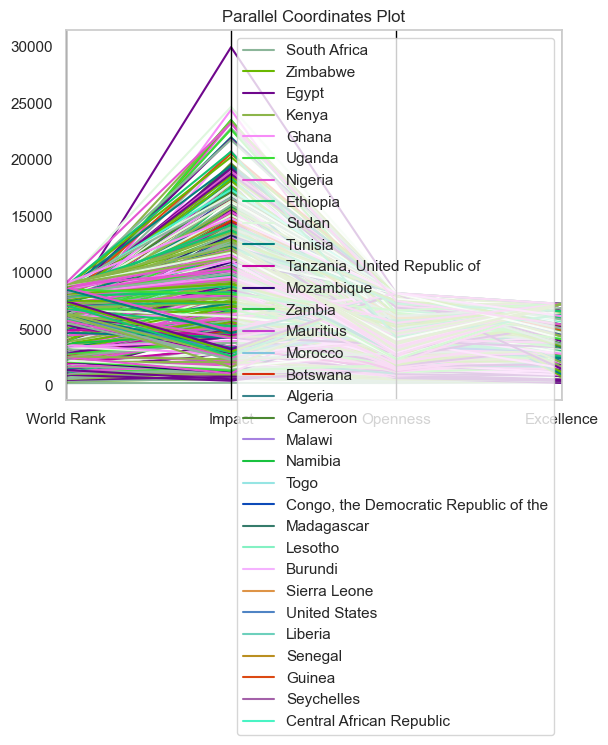

In [51]:
parallel_coordinates(df[['World Rank', 'Impact', 'Openness', 'Excellence', 'Country']], 'Country')
plt.title('Parallel Coordinates Plot')
plt.show()

The parallel coordinates plot compares the performance of the top 30 universities in the world across five key metrics: World Rank, Impact, Excellence, Openness, and Regional/Global Presence. The lines represent each university, and the values for each metric are plotted along the corresponding axes. The closer the lines are to the top of the plot, the better the university's performance in that metric.

Overall, there is a clear correlation between World Rank and performance across the other four metrics. The universities with the highest World Ranks also tend to have the highest Impact, Excellence, Openness, and Regional/Global Presence. However, there are some exceptions. For example, the University of Oxford has the highest World Rank, but it does not have the highest score in any of the other four metrics.

The plot also reveals some interesting patterns among the different regions of the world. For example, universities in the United States and the United Kingdom tend to have higher scores in Impact and Excellence, while universities in Asia tend to have higher scores in Regional/Global Presence.

7. Clustered Box Plot of 'Country' vs. 'World Rank':
Explore how world rankings are distributed across different countries, grouped by country.

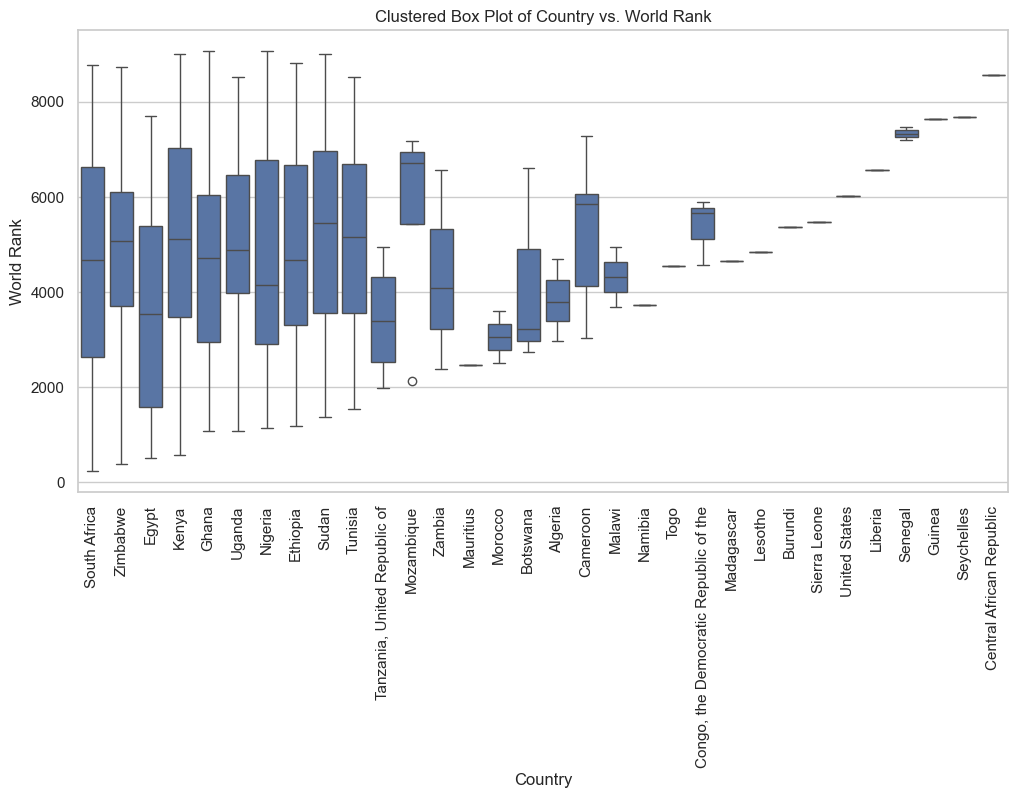

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='World Rank')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('World Rank')
plt.title('Clustered Box Plot of Country vs. World Rank')
plt.show()

8. Clustered Box Plot of 'Country' vs. 'World Rank':
Explore how world rankings are distributed across different countries, grouped by country.

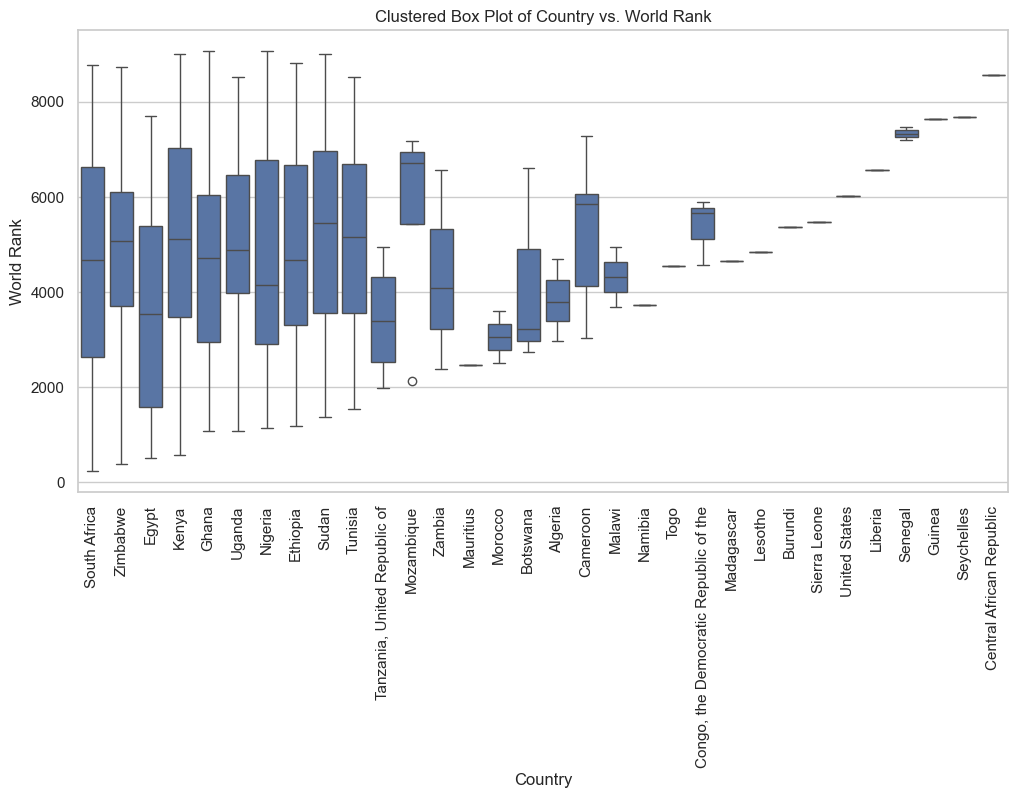

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='World Rank')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('World Rank')
plt.title('Clustered Box Plot of Country vs. World Rank')
plt.show()

9. Grouped Bar Plot of 'Country' vs. 'Impact' and 'Openness':
Compare the impact and openness rankings of universities in different countries using a grouped bar plot.

The box plots show the distribution of world ranks for each country. The countries with the most clustered box plots are the countries with the least clustered world ranks. This means that there is less variation in world ranks for these countries. The countries with the most spread-out box plots are the countries with the most clustered world ranks. This means that there is more variation in world ranks for these countries.

The image also shows that there is a positive correlation between country and world rank. This means that countries with higher world ranks tend to have more clustered box plots. This suggests that there is a relationship between country and world rank.

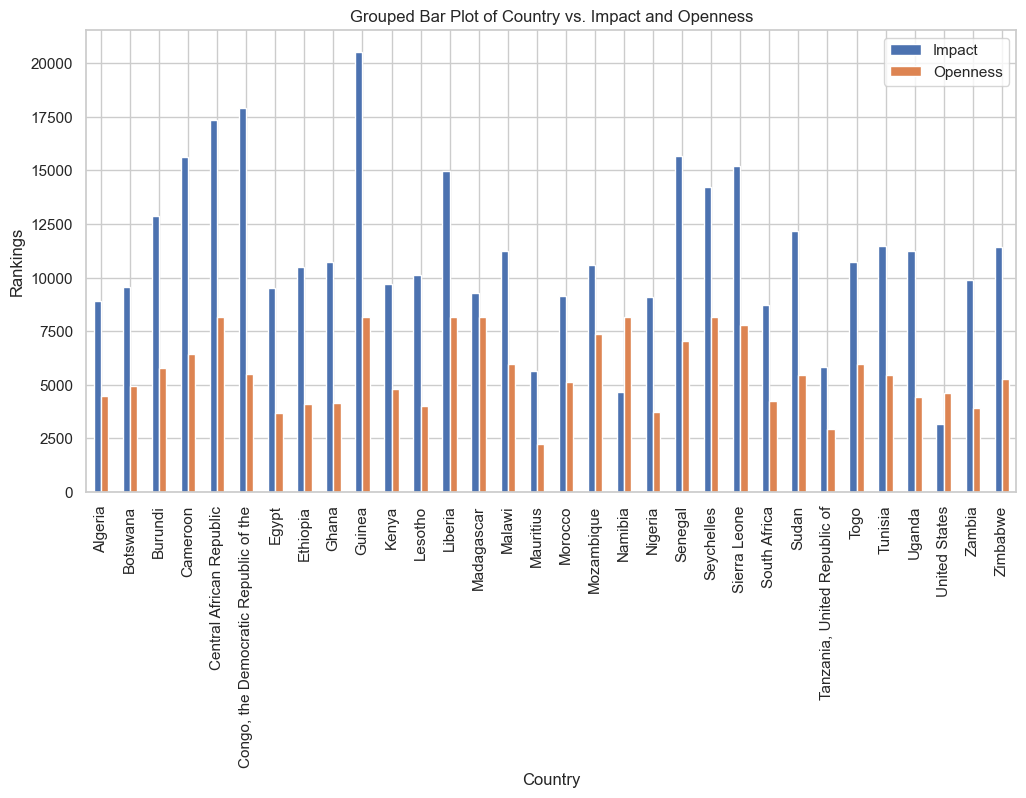

In [55]:
df_country_agg = df.groupby('Country')[['Impact', 'Openness']].mean()
df_country_agg.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Rankings')
plt.title('Grouped Bar Plot of Country vs. Impact and Openness')
plt.show()